In [1]:
#get data from Google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#install packages
import pandas as pd
import numpy as np
import glob

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")

import tensorflow as tf
import keras

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

from keras import optimizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, Conv1D, Dropout, Embedding, GlobalMaxPooling1D


Using TensorFlow backend.


In [0]:
#read in all CSVs to one dataframe
path = 'drive/My Drive/Colab Notebooks/NLP Project Testing/txt_data' 
allFiles = glob.glob(path + "/*.csv")

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

df = pd.concat(list_, axis = 0, ignore_index = True)

In [0]:
#create categorical assignments for authors
df['author_id'] = pd.Categorical(df.author).codes

In [0]:
#read in csv with bin assignments for joining
df_bin = pd.read_csv('drive/My Drive/Colab Notebooks/NLP Project Testing/author_bin_df.csv', 
                     index_col=None)

In [0]:
#Cast indices as strings
df.author = df.author.astype(str)
df_bin.author = df_bin.author.astype(str)

In [0]:
#Join dataframes on author
final_df = df.set_index('author').join(df_bin.set_index('author'))
final_df.reset_index(level=0, inplace=True)

In [8]:
print('Total number of documents:',len(final_df))
print('Total number of authors:',len(final_df['author_id'].unique()))

Total number of documents: 1605
Total number of authors: 134


In [0]:
#subset for 100, 500, 1,000 and 5,000 tags and tokens
final_df['tag_sub_100'] = final_df['tags'].astype(str).str[0:100]
final_df['token_sub_100'] = final_df['tokens'].astype(str).str[0:100]

final_df['tag_sub_500'] = final_df['tags'].astype(str).str[0:500]
final_df['token_sub_500'] = final_df['tokens'].astype(str).str[0:500]

final_df['tag_sub_1000'] = final_df['tags'].astype(str).str[0:1000]
final_df['token_sub_1000'] =  final_df['tokens'].astype(str).str[0:1000]

final_df['tag_sub_5000'] = final_df['tags'].astype(str).str[0:5000]
final_df['token_sub_5000'] =  final_df['tokens'].astype(str).str[0:5000]

#### Baseline Model: Linear SVM

In [0]:
#baseline test for 100 tags

x = final_df['tag_sub_100'].values
y = final_df['author_id'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=13)

tfidf_vec = TfidfVectorizer()
x_train_vec = tfidf_vec.fit_transform(x_train)
x_test_vec  = tfidf_vec.transform(x_test)

base_svm = LinearSVC().fit(x_train_vec, y_train)
predicted = base_svm.predict(x_test_vec)
predicted_score = base_svm.decision_function(x_test_vec)

print('tag accuracy', metrics.accuracy_score(y_test, predicted))


#baseline test for 100 tokens

x = final_df['token_sub_100'].values
y = final_df['author_id'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=13)

tfidf_vec = TfidfVectorizer()
x_train_vec = tfidf_vec.fit_transform(x_train)
x_test_vec  = tfidf_vec.transform(x_test)

base_svm = LinearSVC().fit(x_train_vec, y_train)
predicted = base_svm.predict(x_test_vec)
predicted_score = base_svm.decision_function(x_test_vec)

print('token accuracy', metrics.accuracy_score(y_test, predicted))

tag accuracy 0.12461059190031153
token accuracy 0.7538940809968847


In [0]:
#baseline test for 500 tags

x = final_df['tag_sub_500'].values
y = final_df['author_id'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=13)

tfidf_vec = TfidfVectorizer()
x_train_vec = tfidf_vec.fit_transform(x_train)
x_test_vec  = tfidf_vec.transform(x_test)

base_svm = LinearSVC().fit(x_train_vec, y_train)
predicted = base_svm.predict(x_test_vec)
predicted_score = base_svm.decision_function(x_test_vec)

print('tag accuracy', metrics.accuracy_score(y_test, predicted))


#baseline test for 500 tokens

x = final_df['token_sub_500'].values
y = final_df['author_id'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=13)

tfidf_vec = TfidfVectorizer()
x_train_vec = tfidf_vec.fit_transform(x_train)
x_test_vec  = tfidf_vec.transform(x_test)

base_svm = LinearSVC().fit(x_train_vec, y_train)
predicted = base_svm.predict(x_test_vec)
predicted_score = base_svm.decision_function(x_test_vec)

print('token accuracy', metrics.accuracy_score(y_test, predicted))

tag accuracy 0.1557632398753894
token accuracy 0.8598130841121495


In [0]:
#baseline test for 1000 tags

x = final_df['tag_sub_1000'].values
y = final_df['author_id'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=13)

tfidf_vec = TfidfVectorizer()
x_train_vec = tfidf_vec.fit_transform(x_train)
x_test_vec  = tfidf_vec.transform(x_test)

base_svm = LinearSVC().fit(x_train_vec, y_train)
predicted = base_svm.predict(x_test_vec)
predicted_score = base_svm.decision_function(x_test_vec)

print('tag accuracy', metrics.accuracy_score(y_test, predicted))

#baseline test for 1000 tokens

x = final_df['token_sub_1000'].values
y = final_df['author_id'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=13)

tfidf_vec = TfidfVectorizer()
x_train_vec = tfidf_vec.fit_transform(x_train)
x_test_vec  = tfidf_vec.transform(x_test)

base_svm = LinearSVC().fit(x_train_vec, y_train)
predicted = base_svm.predict(x_test_vec)
predicted_score = base_svm.decision_function(x_test_vec)

print('token accuracy', metrics.accuracy_score(y_test, predicted))

tag accuracy 0.12461059190031153
token accuracy 0.7975077881619937


In [0]:
#baseline test for 5000 tags

x = final_df['tag_sub_5000'].values
y = final_df['author_id'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=13)

tfidf_vec = TfidfVectorizer()
x_train_vec = tfidf_vec.fit_transform(x_train)
x_test_vec  = tfidf_vec.transform(x_test)

base_svm = LinearSVC().fit(x_train_vec, y_train)
predicted = base_svm.predict(x_test_vec)
predicted_score = base_svm.decision_function(x_test_vec)

print('tag accuracy', metrics.accuracy_score(y_test, predicted))

#baseline test for 5000 tokens

x = final_df['token_sub_5000'].values
y = final_df['author_id'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=13)

tfidf_vec = TfidfVectorizer()
x_train_vec = tfidf_vec.fit_transform(x_train)
x_test_vec  = tfidf_vec.transform(x_test)

base_svm = LinearSVC().fit(x_train_vec, y_train)
predicted = base_svm.predict(x_test_vec)
predicted_score = base_svm.decision_function(x_test_vec)

print('token accuracy', metrics.accuracy_score(y_test, predicted))

tag accuracy 0.16822429906542055
token accuracy 0.7040498442367601


#### Comparison Model: Bigram CNN

In [0]:
'''
IF RUNNING: Re-compile model for each test 
'''

#token/tag-level bigram CNN model
model_biCNN = Sequential()
model_biCNN.add(Embedding(max_features, output_dim = 30, input_length = maxlen))
model_biCNN.add(Dropout(0.2))

#kernel size = 2 for bigrams
model_biCNN.add(Conv1D(128, 2, activation='relu'))
model_biCNN.add(Conv1D(128, 2, activation='relu'))

model_biCNN.add(GlobalMaxPooling1D())
model_biCNN.add(Dropout(0.2))
model_biCNN.add(Dense(len(df['author_id'].unique()), activation='softmax'))

#speed up optimization
opt = optimizers.rmsprop(lr=0.001) 

#compile model
model_biCNN.compile(optimizer = opt, 
                    loss="sparse_categorical_crossentropy", 
                    metrics=["acc"])


In [0]:
#CNN test for 100 tags

#data processing for CNN
x = final_df['tag_sub_100'].values 
y = final_df['author_id'].values

#create sequences
max_features = 25000
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(x)
x_sequences  = tokenizer.texts_to_sequences(x)

#pad each sequence to be max length
maxlen = max(len(x) for x in x_sequences)
x_sequences = sequence.pad_sequences(x_sequences, maxlen)

#split test and train data
x_train, x_test, y_train, y_test = train_test_split(x_sequences, y, 
                                                    test_size=0.20, 
                                                    random_state=13)

In [20]:
#record output
history_tags_100 = model_biCNN.fit(x_train, y_train,
            batch_size=64,
            epochs=50,
            validation_data=(x_test, y_test))

Train on 1284 samples, validate on 321 samples
Epoch 1/50
1284/1284 [==============================] - 1s 603us/step - loss: 4.7938 - acc: 0.0187 - val_loss: 4.6154 - val_acc: 0.0187
Epoch 2/50
1284/1284 [==============================] - 0s 134us/step - loss: 4.5389 - acc: 0.0327 - val_loss: 4.5604 - val_acc: 0.0280
Epoch 3/50
1284/1284 [==============================] - 0s 137us/step - loss: 4.5132 - acc: 0.0343 - val_loss: 4.5597 - val_acc: 0.0280
Epoch 4/50
1284/1284 [==============================] - 0s 134us/step - loss: 4.4857 - acc: 0.0296 - val_loss: 4.5542 - val_acc: 0.0187
Epoch 5/50
1284/1284 [==============================] - 0s 133us/step - loss: 4.4789 - acc: 0.0405 - val_loss: 4.5603 - val_acc: 0.0467
Epoch 6/50
1284/1284 [==============================] - 0s 134us/step - loss: 4.4706 - acc: 0.0428 - val_loss: 4.5619 - val_acc: 0.0218
Epoch 7/50
1284/1284 [==============================] - 0s 138us/step - loss: 4.4603 - acc: 0.0366 - val_loss: 4.5694 - val_acc: 0.0467
E

In [0]:
#CNN test for 100 tokens

#data processing for CNN
x = final_df['token_sub_100'].values 
y = final_df['author_id'].values

#create sequences
max_features = 25000
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(x)
x_sequences  = tokenizer.texts_to_sequences(x)

#pad each sequence to be max length
maxlen = max(len(x) for x in x_sequences)
x_sequences = sequence.pad_sequences(x_sequences, maxlen)

#split test and train data
x_train, x_test, y_train, y_test = train_test_split(x_sequences, y, 
                                                    test_size=0.20, 
                                                    random_state=13)

In [23]:
#record output
history_tokens_100 = model_biCNN.fit(x_train, y_train,
            batch_size=64,
            epochs=50,
            validation_data=(x_test, y_test))

Train on 1284 samples, validate on 321 samples
Epoch 1/50
1284/1284 [==============================] - 1s 488us/step - loss: 4.7792 - acc: 0.0140 - val_loss: 4.6437 - val_acc: 0.0280
Epoch 2/50
1284/1284 [==============================] - 0s 138us/step - loss: 4.5369 - acc: 0.0374 - val_loss: 4.5567 - val_acc: 0.0498
Epoch 3/50
1284/1284 [==============================] - 0s 141us/step - loss: 4.4816 - acc: 0.0467 - val_loss: 4.5210 - val_acc: 0.0654
Epoch 4/50
1284/1284 [==============================] - 0s 134us/step - loss: 4.4369 - acc: 0.0584 - val_loss: 4.4867 - val_acc: 0.0498
Epoch 5/50
1284/1284 [==============================] - 0s 151us/step - loss: 4.3743 - acc: 0.0685 - val_loss: 4.4311 - val_acc: 0.0623
Epoch 6/50
1284/1284 [==============================] - 0s 133us/step - loss: 4.2834 - acc: 0.0826 - val_loss: 4.3508 - val_acc: 0.1308
Epoch 7/50
1284/1284 [==============================] - 0s 141us/step - loss: 4.1512 - acc: 0.1355 - val_loss: 4.2154 - val_acc: 0.1807
E

In [0]:
#CNN test for 500 tags

#data processing for CNN
x = final_df['tag_sub_500'].values 
y = final_df['author_id'].values

#create sequences
max_features = 25000
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(x)
x_sequences  = tokenizer.texts_to_sequences(x)

#pad each sequence to be max length
maxlen = max(len(x) for x in x_sequences)
x_sequences = sequence.pad_sequences(x_sequences, maxlen)

#split test and train data
x_train, x_test, y_train, y_test = train_test_split(x_sequences, y, 
                                                    test_size=0.20, 
                                                    random_state=13)

In [26]:
#record output
history_tags_500 = model_biCNN.fit(x_train, y_train,
            batch_size=64,
            epochs=50,
            validation_data=(x_test, y_test))

Train on 1284 samples, validate on 321 samples
Epoch 1/50
1284/1284 [==============================] - 1s 909us/step - loss: 4.7851 - acc: 0.0164 - val_loss: 4.6008 - val_acc: 0.0280
Epoch 2/50
1284/1284 [==============================] - 0s 193us/step - loss: 4.5386 - acc: 0.0350 - val_loss: 4.5417 - val_acc: 0.0218
Epoch 3/50
1284/1284 [==============================] - 0s 183us/step - loss: 4.5074 - acc: 0.0304 - val_loss: 4.5419 - val_acc: 0.0218
Epoch 4/50
1284/1284 [==============================] - 0s 173us/step - loss: 4.4922 - acc: 0.0312 - val_loss: 4.5438 - val_acc: 0.0218
Epoch 5/50
1284/1284 [==============================] - 0s 164us/step - loss: 4.4785 - acc: 0.0288 - val_loss: 4.5490 - val_acc: 0.0280
Epoch 6/50
1284/1284 [==============================] - 0s 161us/step - loss: 4.4682 - acc: 0.0280 - val_loss: 4.5497 - val_acc: 0.0249
Epoch 7/50
1284/1284 [==============================] - 0s 173us/step - loss: 4.4681 - acc: 0.0389 - val_loss: 4.5490 - val_acc: 0.0187
E

In [0]:
#CNN test for 500 tokens

#data processing for CNN
x = final_df['token_sub_500'].values 
y = final_df['author_id'].values

#create sequences
max_features = 25000
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(x)
x_sequences  = tokenizer.texts_to_sequences(x)

#pad each sequence to be max length
maxlen = max(len(x) for x in x_sequences)
x_sequences = sequence.pad_sequences(x_sequences, maxlen)

#split test and train data
x_train, x_test, y_train, y_test = train_test_split(x_sequences, y, 
                                                    test_size=0.20, 
                                                    random_state=13)

In [29]:
#record output
history_tokens_500 = model_biCNN.fit(x_train, y_train,
            batch_size=64,
            epochs=50,
            validation_data=(x_test, y_test))

Train on 1284 samples, validate on 321 samples
Epoch 1/50
1284/1284 [==============================] - 2s 1ms/step - loss: 4.8014 - acc: 0.0210 - val_loss: 4.6576 - val_acc: 0.0280
Epoch 2/50
1284/1284 [==============================] - 0s 147us/step - loss: 4.5364 - acc: 0.0273 - val_loss: 4.5563 - val_acc: 0.0405
Epoch 3/50
1284/1284 [==============================] - 0s 151us/step - loss: 4.4873 - acc: 0.0382 - val_loss: 4.5354 - val_acc: 0.0187
Epoch 4/50
1284/1284 [==============================] - 0s 152us/step - loss: 4.4457 - acc: 0.0522 - val_loss: 4.4844 - val_acc: 0.0187
Epoch 5/50
1284/1284 [==============================] - 0s 156us/step - loss: 4.3699 - acc: 0.0646 - val_loss: 4.4119 - val_acc: 0.0935
Epoch 6/50
1284/1284 [==============================] - 0s 155us/step - loss: 4.2723 - acc: 0.0919 - val_loss: 4.2936 - val_acc: 0.0966
Epoch 7/50
1284/1284 [==============================] - 0s 163us/step - loss: 4.1227 - acc: 0.1308 - val_loss: 4.1378 - val_acc: 0.1745
Epo

In [0]:
#CNN test for 1000 tags

#data processing for CNN
x = final_df['tag_sub_1000'].values 
y = final_df['author_id'].values

#create sequences
max_features = 25000
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(x)
x_sequences  = tokenizer.texts_to_sequences(x)

#pad each sequence to be max length
maxlen = max(len(x) for x in x_sequences)
x_sequences = sequence.pad_sequences(x_sequences, maxlen)

#split test and train data
x_train, x_test, y_train, y_test = train_test_split(x_sequences, y, 
                                                    test_size=0.20, 
                                                    random_state=13)

In [32]:
#record output
history_tags_1000 = model_biCNN.fit(x_train, y_train,
            batch_size=64,
            epochs=50,
            validation_data=(x_test, y_test))

Train on 1284 samples, validate on 321 samples
Epoch 1/50
1284/1284 [==============================] - 1s 665us/step - loss: 4.7727 - acc: 0.0226 - val_loss: 4.6289 - val_acc: 0.0187
Epoch 2/50
1284/1284 [==============================] - 0s 218us/step - loss: 4.5502 - acc: 0.0249 - val_loss: 4.5739 - val_acc: 0.0187
Epoch 3/50
1284/1284 [==============================] - 0s 221us/step - loss: 4.4943 - acc: 0.0397 - val_loss: 4.5696 - val_acc: 0.0187
Epoch 4/50
1284/1284 [==============================] - 0s 216us/step - loss: 4.4881 - acc: 0.0366 - val_loss: 4.5629 - val_acc: 0.0187
Epoch 5/50
1284/1284 [==============================] - 0s 216us/step - loss: 4.4771 - acc: 0.0288 - val_loss: 4.5566 - val_acc: 0.0218
Epoch 6/50
1284/1284 [==============================] - 0s 218us/step - loss: 4.4638 - acc: 0.0382 - val_loss: 4.5490 - val_acc: 0.0436
Epoch 7/50
1284/1284 [==============================] - 0s 224us/step - loss: 4.4645 - acc: 0.0428 - val_loss: 4.5597 - val_acc: 0.0405
E

In [0]:
#CNN test for 1000 tokens

#data processing for CNN
x = final_df['token_sub_1000'].values 
y = final_df['author_id'].values

#create sequences
max_features = 25000
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(x)
x_sequences  = tokenizer.texts_to_sequences(x)

#pad each sequence to be max length
maxlen = max(len(x) for x in x_sequences)
x_sequences = sequence.pad_sequences(x_sequences, maxlen)

#split test and train data
x_train, x_test, y_train, y_test = train_test_split(x_sequences, y, 
                                                    test_size=0.20, 
                                                    random_state=13)

In [35]:
#record output
history_tokens_1000 = model_biCNN.fit(x_train, y_train,
            batch_size=64,
            epochs=50,
            validation_data=(x_test, y_test))

Train on 1284 samples, validate on 321 samples
Epoch 1/50
1284/1284 [==============================] - 1s 715us/step - loss: 4.7976 - acc: 0.0273 - val_loss: 4.6410 - val_acc: 0.0218
Epoch 2/50
1284/1284 [==============================] - 0s 236us/step - loss: 4.5403 - acc: 0.0265 - val_loss: 4.5605 - val_acc: 0.0280
Epoch 3/50
1284/1284 [==============================] - 0s 216us/step - loss: 4.5055 - acc: 0.0319 - val_loss: 4.5492 - val_acc: 0.0280
Epoch 4/50
1284/1284 [==============================] - 0s 203us/step - loss: 4.4774 - acc: 0.0350 - val_loss: 4.5423 - val_acc: 0.0187
Epoch 5/50
1284/1284 [==============================] - 0s 208us/step - loss: 4.4499 - acc: 0.0397 - val_loss: 4.5219 - val_acc: 0.0592
Epoch 6/50
1284/1284 [==============================] - 0s 205us/step - loss: 4.4281 - acc: 0.0475 - val_loss: 4.4961 - val_acc: 0.0841
Epoch 7/50
1284/1284 [==============================] - 0s 212us/step - loss: 4.3725 - acc: 0.0701 - val_loss: 4.4467 - val_acc: 0.1153
E

In [0]:
#CNN test for 5000 tags

#data processing for CNN
x = final_df['tag_sub_5000'].values 
y = final_df['author_id'].values

#create sequences
max_features = 25000
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(x)
x_sequences  = tokenizer.texts_to_sequences(x)

#pad each sequence to be max length
maxlen = max(len(x) for x in x_sequences)
x_sequences = sequence.pad_sequences(x_sequences, maxlen)

#split test and train data
x_train, x_test, y_train, y_test = train_test_split(x_sequences, y, 
                                                    test_size=0.20, 
                                                    random_state=13)

In [38]:
#record output
history_tags_5000 = model_biCNN.fit(x_train, y_train,
            batch_size=64,
            epochs=50,
            validation_data=(x_test, y_test))

Train on 1284 samples, validate on 321 samples
Epoch 1/50
1284/1284 [==============================] - 2s 1ms/step - loss: 4.7911 - acc: 0.0280 - val_loss: 4.6451 - val_acc: 0.0187
Epoch 2/50
1284/1284 [==============================] - 1s 750us/step - loss: 4.5454 - acc: 0.0374 - val_loss: 4.5492 - val_acc: 0.0218
Epoch 3/50
1284/1284 [==============================] - 1s 757us/step - loss: 4.5045 - acc: 0.0335 - val_loss: 4.5495 - val_acc: 0.0280
Epoch 4/50
1284/1284 [==============================] - 1s 750us/step - loss: 4.4952 - acc: 0.0296 - val_loss: 4.5503 - val_acc: 0.0187
Epoch 5/50
1284/1284 [==============================] - 1s 749us/step - loss: 4.4787 - acc: 0.0358 - val_loss: 4.5538 - val_acc: 0.0280
Epoch 6/50
1284/1284 [==============================] - 1s 766us/step - loss: 4.4840 - acc: 0.0312 - val_loss: 4.5640 - val_acc: 0.0187
Epoch 7/50
1284/1284 [==============================] - 1s 749us/step - loss: 4.4830 - acc: 0.0327 - val_loss: 4.5720 - val_acc: 0.0218
Epo

In [0]:
#CNN test for 5000 tokens

#data processing for CNN
x = final_df['token_sub_5000'].values 
y = final_df['author_id'].values

#create sequences
max_features = 25000
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(x)
x_sequences  = tokenizer.texts_to_sequences(x)

#pad each sequence to be max length
maxlen = max(len(x) for x in x_sequences)
x_sequences = sequence.pad_sequences(x_sequences, maxlen)

#split test and train data
x_train, x_test, y_train, y_test = train_test_split(x_sequences, y, 
                                                    test_size=0.20, 
                                                    random_state=13)

In [41]:
#record output
history_tokens_5000 = model_biCNN.fit(x_train, y_train,
            batch_size=64,
            epochs=50,
            validation_data=(x_test, y_test))

Train on 1284 samples, validate on 321 samples
Epoch 1/50
1284/1284 [==============================] - 2s 1ms/step - loss: 4.7741 - acc: 0.0249 - val_loss: 4.6296 - val_acc: 0.0187
Epoch 2/50
1284/1284 [==============================] - 1s 722us/step - loss: 4.5462 - acc: 0.0288 - val_loss: 4.5774 - val_acc: 0.0187
Epoch 3/50
1284/1284 [==============================] - 1s 717us/step - loss: 4.4993 - acc: 0.0350 - val_loss: 4.5558 - val_acc: 0.0467
Epoch 4/50
1284/1284 [==============================] - 1s 713us/step - loss: 4.4868 - acc: 0.0304 - val_loss: 4.5513 - val_acc: 0.0187
Epoch 5/50
1284/1284 [==============================] - 1s 715us/step - loss: 4.4707 - acc: 0.0343 - val_loss: 4.5583 - val_acc: 0.0187
Epoch 6/50
1284/1284 [==============================] - 1s 715us/step - loss: 4.4542 - acc: 0.0444 - val_loss: 4.5271 - val_acc: 0.0467
Epoch 7/50
1284/1284 [==============================] - 1s 713us/step - loss: 4.4168 - acc: 0.0639 - val_loss: 4.4904 - val_acc: 0.0841
Epo

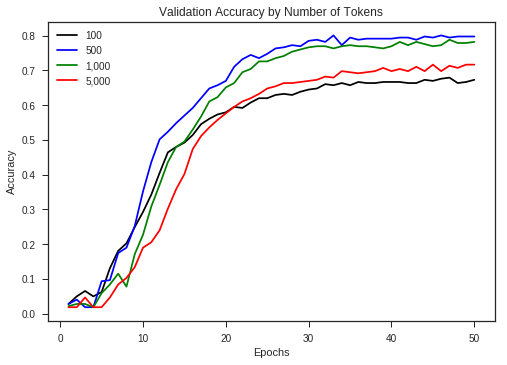

In [42]:
#plot validation set accuracies for tokens

#get accuracy values for tokens
acc100 = history_tokens_100.history['val_acc']
acc500 = history_tokens_500.history['val_acc']
acc1000 = history_tokens_1000.history['val_acc']
acc5000 = history_tokens_5000.history['val_acc']

#define plot grid
epochs = range(1, 50 + 1)

#plot lines
plt.plot(epochs, acc100, 'b', label='100', color='k')
plt.plot(epochs, acc500, 'b', label='500', color='b')
plt.plot(epochs, acc1000, 'b', label='1,000', color='g')
plt.plot(epochs, acc5000, 'b', label='5,000', color='r')

plt.title('Validation Accuracy by Number of Tokens')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

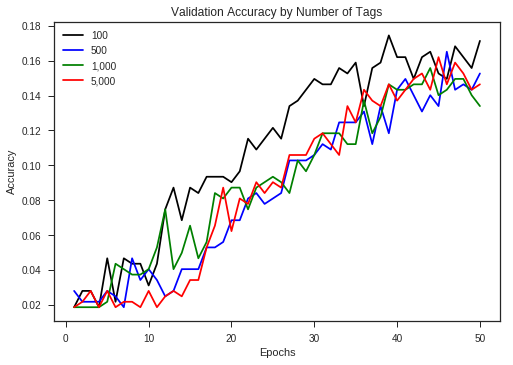

In [43]:
#plot validation set accuracies for tags

#get accuracy values for tokens
acc100 = history_tags_100.history['val_acc']
acc500 = history_tags_500.history['val_acc']
acc1000 = history_tags_1000.history['val_acc']
acc5000 = history_tags_5000.history['val_acc']

#define plot grid
epochs = range(1, 50 + 1)

#plot lines
plt.plot(epochs, acc100, 'b', label='100', color='k')
plt.plot(epochs, acc500, 'b', label='500', color='b')
plt.plot(epochs, acc1000, 'b', label='1,000', color='g')
plt.plot(epochs, acc5000, 'b', label='5,000', color='r')

plt.title('Validation Accuracy by Number of Tags')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
#500 tokens, 100 tags for bins

In [0]:
#CNN test for 500 tokens with bins

#data processing for CNN
x = final_df['token_sub_500'].values 
y = final_df['bin'].values

#create sequences
max_features = 25000
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(x)
x_sequences  = tokenizer.texts_to_sequences(x)

#pad each sequence to be max length
maxlen = max(len(x) for x in x_sequences)
x_sequences = sequence.pad_sequences(x_sequences, maxlen)

#split test and train data
x_train, x_test, y_train, y_test = train_test_split(x_sequences, y, 
                                                    test_size=0.20, 
                                                    random_state=13)

In [46]:
#record output
history_bins_tokens_500 = model_biCNN.fit(x_train, y_train,
            batch_size=64,
            epochs=50,
            validation_data=(x_test, y_test))

Train on 1284 samples, validate on 321 samples
Epoch 1/50
1284/1284 [==============================] - 1s 757us/step - loss: 2.6991 - acc: 0.6394 - val_loss: 1.0562 - val_acc: 0.6449
Epoch 2/50
1284/1284 [==============================] - 0s 208us/step - loss: 0.9509 - acc: 0.6643 - val_loss: 0.9100 - val_acc: 0.6449
Epoch 3/50
1284/1284 [==============================] - 0s 194us/step - loss: 0.9135 - acc: 0.6674 - val_loss: 0.9648 - val_acc: 0.6449
Epoch 4/50
1284/1284 [==============================] - 0s 188us/step - loss: 0.9182 - acc: 0.6690 - val_loss: 0.9434 - val_acc: 0.6449
Epoch 5/50
1284/1284 [==============================] - 0s 178us/step - loss: 0.9040 - acc: 0.6698 - val_loss: 0.8773 - val_acc: 0.6449
Epoch 6/50
1284/1284 [==============================] - 0s 171us/step - loss: 0.8591 - acc: 0.6698 - val_loss: 0.8639 - val_acc: 0.6449
Epoch 7/50
1284/1284 [==============================] - 0s 172us/step - loss: 0.7931 - acc: 0.6877 - val_loss: 0.7105 - val_acc: 0.7165
E

In [0]:
#CNN test for 100 tags with bins

#data processing for CNN
x = final_df['tag_sub_100'].values 
y = final_df['bin'].values

#create sequences
max_features = 25000
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(x)
x_sequences  = tokenizer.texts_to_sequences(x)

#pad each sequence to be max length
maxlen = max(len(x) for x in x_sequences)
x_sequences = sequence.pad_sequences(x_sequences, maxlen)

#split test and train data
x_train, x_test, y_train, y_test = train_test_split(x_sequences, y, 
                                                    test_size=0.20, 
                                                    random_state=13)

In [49]:
#record output
history_bins_tags_100 = model_biCNN.fit(x_train, y_train,
            batch_size=64,
            epochs=50,
            validation_data=(x_test, y_test))

Train on 1284 samples, validate on 321 samples
Epoch 1/50
1284/1284 [==============================] - 1s 816us/step - loss: 2.8548 - acc: 0.6417 - val_loss: 1.0034 - val_acc: 0.6449
Epoch 2/50
1284/1284 [==============================] - 0s 145us/step - loss: 0.9503 - acc: 0.6682 - val_loss: 0.9087 - val_acc: 0.6449
Epoch 3/50
1284/1284 [==============================] - 0s 140us/step - loss: 0.9234 - acc: 0.6620 - val_loss: 1.0093 - val_acc: 0.6449
Epoch 4/50
1284/1284 [==============================] - 0s 138us/step - loss: 0.9222 - acc: 0.6690 - val_loss: 0.9287 - val_acc: 0.6449
Epoch 5/50
1284/1284 [==============================] - 0s 144us/step - loss: 0.9108 - acc: 0.6682 - val_loss: 0.8999 - val_acc: 0.6449
Epoch 6/50
1284/1284 [==============================] - 0s 153us/step - loss: 0.9141 - acc: 0.6589 - val_loss: 0.9146 - val_acc: 0.6449
Epoch 7/50
1284/1284 [==============================] - 0s 158us/step - loss: 0.8934 - acc: 0.6690 - val_loss: 0.9284 - val_acc: 0.6449
E

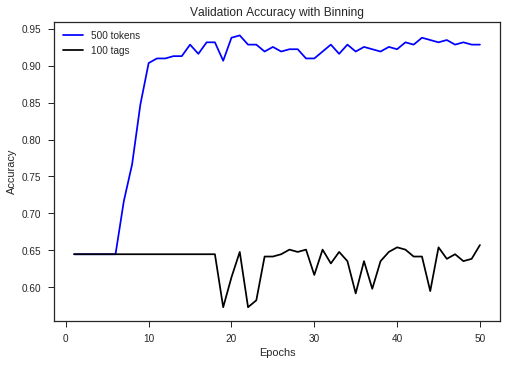

In [50]:
#plot validation set accuracies for binning

#get accuracy values
acc500 = history_bins_tokens_500.history['val_acc']
acc100 = history_bins_tags_100.history['val_acc']

#define plot grid
epochs = range(1, 50 + 1)

#plot lines
plt.plot(epochs, acc500, 'b', label='500 tokens', color='b')
plt.plot(epochs, acc100, 'b', label='100 tags', color='k')

plt.title('Validation Accuracy with Binning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()